**Data Preprocessing & Expolatory Data analysis**

In [1]:
##Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
df=pd.read_csv('/content/insurance_claims.csv')

In [ ]:
# finding dimensions of dataset
df.shape

In [ ]:
# printing first few rows of dataset
df.head()

In [ ]:
# statistical details of data
df.describe()

In [ ]:
# about data and its types
df.info()

In [ ]:
#shows total count per variable
df.count()

In [ ]:
# Looking for Duplicate Rows
duplicate_rows_df=df[df.duplicated()]
print("No. of Duplicate rows", duplicate_rows_df.shape)
df.duplicated().sum()

In [ ]:
# Check for missing values
print(df.isnull().sum())

In [ ]:
#boxplot to check outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df.drop(columns=['Fraud']))
plt.xticks(rotation=90)
plt.title("Box Plot of Variables")
plt.show()


In [ ]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_data.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Drop irrelevant columns
dropped_columns = ["PolicyholderNumber", "FirstPartyVehicleNumber", "ReferenceId",
             "ThirdPartyVehicleNumber", "InsurerNotes", "FirstPolicySubscriptionDate", "LossDate"]
df_dc = df.drop(columns=dropped_columns)


In [ ]:
# Apply One-Hot Encoding to categorical variables
df_final = pd.get_dummies(df_dc, drop_first=True)
df_final.head()

In [ ]:
# Check for missing values
print(df_final.isnull().sum())

In [ ]:
fraud_count = df_final["Fraud"].value_counts()

# Print the distribution
print("Distribution of Fraud Cases")
print(fraud_count)

In [ ]:
# Visualize class distribution
plt.figure(figsize=(4,4))
sns.countplot(x=df_final["Fraud"])
plt.title("Distribution of Class: Fraudulent Claims vs Non-Fraudulent Claims")
plt.xlabel("Fraud cases (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Total Count")
plt.show()

In [ ]:
# Define features and target variable
X = df_final.drop('Fraud', axis=1)  # Features
y = df_final['Fraud']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Here, X contains the features and y contains the target variable (y is whether or not a insurance claim is fraud).

The data is split into 80% for training and 20% for testing

Since the Distribution shows there are 9900 non fraud and 100 fraud claims, this shows an imbalance in this data set. We will now use SMOTE to balance the dataset

**SMOTE**

In [ ]:
#use AI to generate this code
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(X_train_smote.shape)
print(y_train_smote.shape)

In [ ]:
#dividing non fraud claim and fraud claim in equal number to balance the set
print(y_train_smote.value_counts())
print(X_train_smote.value_counts())

Logistic regression is sensitive to the scale of features. Therefore, scaling is recommended

In [ ]:
scaler = StandardScaler()
x_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

StandardScaler is used here to ensure that each feature has a mean of zero and a standard deviation of one.



Now, we will create and train a logistic regression model.

In [ ]:
# Create logistic regression model
log_reg = LogisticRegression()

# Train the model on training data
log_reg.fit(x_train_smote, y_train_smote)

In [ ]:
# Predict the test set results
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print(y_pred)
print(y_pred.shape)

The `predict()` method is used to make predictions on unseen data (i.e., the test set).


To assess how well our logistic regression model performed, we will use metrics such as **accuracy score**, **confusion matrix**, and **classification report**.


AUC-ROC: 0.62
Accuracy: 0.986

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1980
         1.0       0.00      0.00      0.00        20

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.98      0.99      0.98      2000



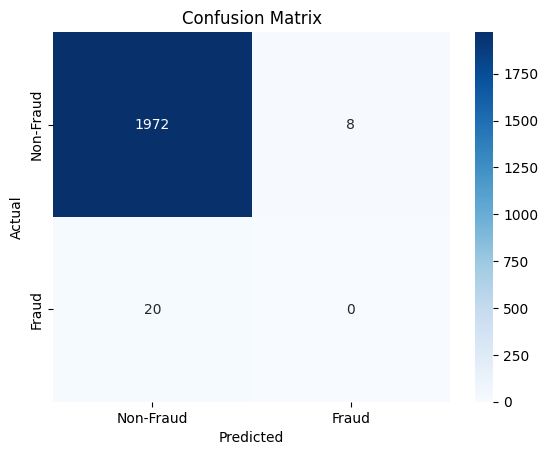

In [ ]:
# Evaluate the model

auc_roc = roc_auc_score(y_test, y_prob) #through AI
print(f"AUC-ROC: {auc_roc:.2f}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Analyze the Confusion Matrix for False Positives/Negatives.

We have data set of 10000 insurance claims. We divide these 10000 claims for 80% training (8000 claims) and 20% testing (2000 claims). After training our model, when we run a logistic regression on 2000 claims (test sets), out of these 1980 were in actually non fruad and 20 were fruad. Out of these 1980 non fraud claims, the modelpredicts 1972 correctly as non fraud and claims 8 as fraud. Out of 20 fraud claims the model predicted 0 and predicts all as non fraud.

True Negative: 1972 non Fraudulent claims (legitimate claims)  correctly identified as legitimate.

False Negative: 20 fraudulent claims incorrectly classified as legitimate.

True Positive: Model fails to correctly identify any fraud cases.

False Poisitive: 8 legitimate claims incorrectly flagged as fraud.

AUC-ROC Score: 0.62 means the model correctly predicts fraud vs non fraud 62 % of the times






# **Key Insights:**

***Performance Metrics:***

The model attains 0.986 accuracy due to non-fraud transactions outnumbering the data but this figure serves no practical value for preventing fraud detection failures as it predicts 0 right fraud.

The recall rate for Fraud Cases amounts to 0% (0/20) thus demonstrating that the model entirely fails to detect fraud which shows that it is unsafe for financial loss mitigation.

F1 Score: Very poor for fraud detection, but great for non fradulent claims detection.

***Strength:***

High Accuracy for Non-Fraud Transactions: Non-fraud transactions receive classification accuracy from the model with 97.6% precision.

Low False Positives: The system generates only eight errors among non-fraud transactions which means fraud alerts will not occur frequently.

***Weaknesses:***

The model fails to identify any cases of fraud which is a critical issue (True Positive = 0). The failure to detect fraud cases represents a significant problem for financial security.

Severe Class Imbalance: The available dataset has substantially more examples of non-fraud transactions compared to cases of fraud. The model remains biased toward the majority class even after the application of Smote because of its inclination to ignore fraud cases.

# **Recommendations:**

1) Resampling technique:

*   Oversampling Fraud Cases
*   Undersampling Non-Fraud Cases
*   Collect More Fraud Data to train the model better

2) Apply Regularization & Hyperparameter Tuning:

The model fits too closely with non-fraud cases because it receives more imbalanced data.

Solutions:

The implementation of L1/L2 regularization (Ridge, Lasso) functions to reduce overfitting occurs.

Tune system threshold parameters in order to promote fraud identification.

3) Elements of the prediction model serve as leakage channels and simultaneously fail to bring sufficient effectiveness to the model results.

Solutions:

Remove potential data leakage features (e.g., ReferenceId, PolicyholderNumber).

The system requires new features to detect fraud patterns such as monitoring high claim amounts in short duration or unusual login locations.

Transform date/time characteristics into essential classification groups which include weekend and weekday alongside rush hour and non-rush hour periods.

